In [1]:
from Handler.SequenceAnalysisHandler import SequenceAnalysisHandler
from Handler.OcclusionHandler import OcclusionHandler
from Handler.utils import MDEThresholdMode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mde_threshold_mode = MDEThresholdMode.MIN_UF_MAX
use_topography = True
fastloading = True
model = './DenseDepth/nyu.h5'
model = None

### Paulusstraße

In [3]:
def rename_mde_threshold_mode(topo: bool, mode: MDEThresholdMode):
    return f"Topo={topo} {str(mode).split('.')[-1]}".replace('HAND', 'WHAND').split('W')[-1]


def collect_data(seq, df):
    modes = []
    modes_tmp = [MDEThresholdMode.MAX, MDEThresholdMode.UF, MDEThresholdMode.MIN_UF_MAX, MDEThresholdMode.QUARTILE3]
    modes.extend(modes_tmp)
    modes.extend(modes_tmp)
    modes.append(MDEThresholdMode.HAND)
    use_topography_list = [False, False, False, False, True, True, True, True, False]
    for use_topography, mde_threshold_mode in zip(use_topography_list[4:], modes[4:]):
        # evaluator = seq.analyze_mde_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)
        evaluator_sky = seq.analyze_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)
        # df_tmp = pd.DataFrame(
        #     {'Algorithm': 'mde', 'Mode': rename_mde_threshold_mode(use_topography, mde_threshold_mode), 'Rate Type': 'Mean FPR', 'Rate': evaluator.fprs})
        # df_tmp = pd.concat([df_tmp, pd.DataFrame(
        #     {'Algorithm': 'mde', 'Mode': rename_mde_threshold_mode(use_topography, mde_threshold_mode), 'Rate Type': 'Mean FNR', 'Rate': evaluator.fnrs})])
        df_sky_tmp = pd.DataFrame(
            {'Algorithm': 'mde+sky', 'Mode': rename_mde_threshold_mode(use_topography, mde_threshold_mode), 'Rate Type': 'Mean FPR', 'Rate': evaluator_sky.fprs})
        df_sky_tmp = pd.concat([df_sky_tmp, pd.DataFrame(
            {'Algorithm': 'mde+sky', 'Mode': rename_mde_threshold_mode(use_topography, mde_threshold_mode), 'Rate Type': 'Mean FNR',
             'Rate': evaluator_sky.fnrs})])
        df = pd.concat([df, df_sky_tmp])
    return df


def plot_dataframe(df, title=""):
    fig, axes = plt.subplots(1, 1, figsize=(6, 4))
    # sns.barplot(data=df[df.Algorithm == 'mde'], x='Mode', hue='Rate Type', y='Rate', ax=axes[0])
    sns.barplot(data=df[df.Algorithm == 'mde+sky'], x='Mode', hue='Rate Type', y='Rate', ax=axes, palette=['r', 'orange'])
    axes.tick_params(axis='x', rotation=90)
    axes.set_xlabel('Thresholding Mode')
    axes.set_ylim(0,1)
    axes.set_title(title)

In [4]:
handler = OcclusionHandler(path_prefix="./FullPaulustr/", model=model)
seq = SequenceAnalysisHandler(handler)
df_paul = pd.DataFrame()
df_paul = collect_data(seq, df_paul)

100%|██████████| 7/7 [00:02<00:00,  3.27it/s]


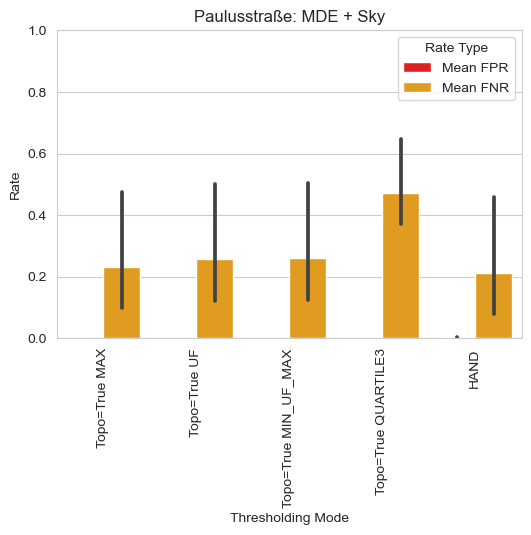

In [5]:
plot_dataframe(df_paul, title='Paulusstraße: MDE + Sky')

In [6]:
handler = OcclusionHandler(path_prefix="./InformatikZentrum/", model=model)
seq = SequenceAnalysisHandler(handler)
df_inf = pd.DataFrame()
df_inf = collect_data(seq, df_inf)

100%|██████████| 29/29 [00:07<00:00,  3.68it/s]


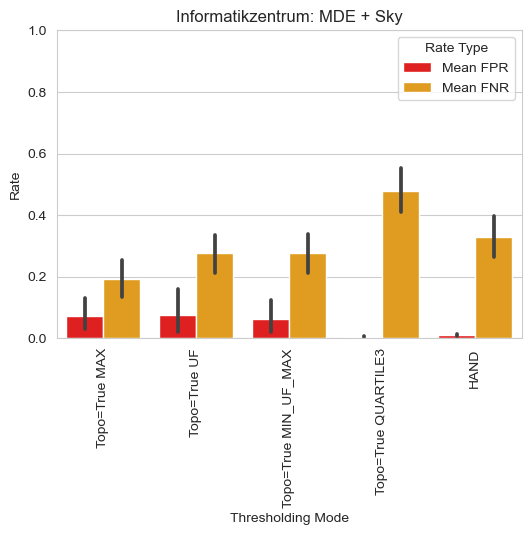

In [7]:
plot_dataframe(df_inf, 'Informatikzentrum: MDE + Sky')

### Königshügel

In [8]:
handler = OcclusionHandler(path_prefix="./Koenigshuegel/", model=model)
seq = SequenceAnalysisHandler(handler)
df_koen = pd.DataFrame()
df_koen = collect_data(seq, df_koen)

100%|██████████| 13/13 [00:03<00:00,  3.37it/s]


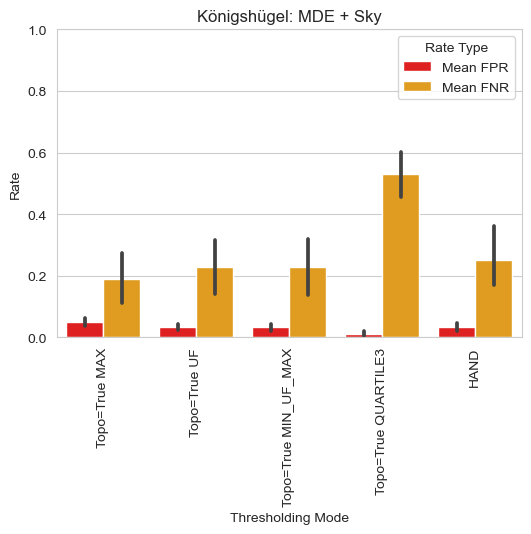

In [9]:
plot_dataframe(df_koen, 'Königshügel: MDE + Sky')

### Lousberg

In [10]:
handler = OcclusionHandler(path_prefix="./Lousberg/", model=model)
seq = SequenceAnalysisHandler(handler, 0, 11)
# evaluator_lous = seq.analyze_mde_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)
# evaluator_lous_sky = seq.analyze_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)
df_lous = pd.DataFrame()
df_lous = collect_data(seq, df_lous)

100%|██████████| 12/12 [00:03<00:00,  3.39it/s]


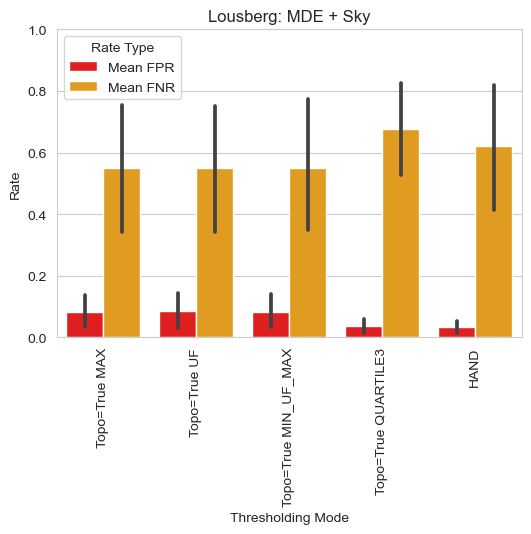

In [11]:
plot_dataframe(df_lous, 'Lousberg: MDE + Sky')

# All FPR and FNR Eval

In [12]:
df_all = pd.concat([df_paul, df_koen, df_inf, df_lous])
df_all_no_hand = df_all[df_all['Mode']!='HAND']

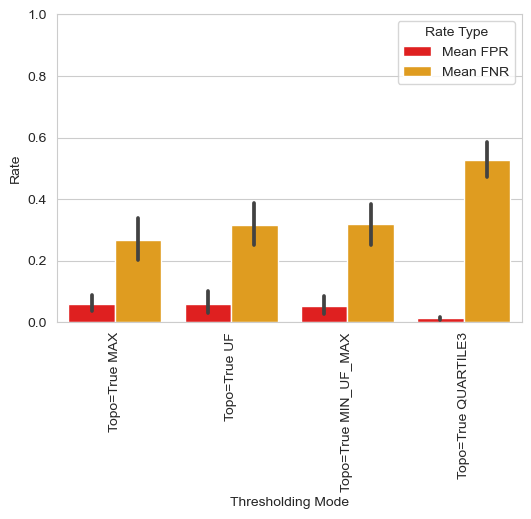

In [13]:
plot_dataframe(df_all_no_hand)

In [14]:
df_mde = df_all.loc[df_all['Algorithm'] == 'mde', ['Rate Type', 'Rate']]
df_mde_sky = df_all.loc[df_all['Algorithm'] == 'mde+sky', ['Rate Type', 'Rate']]

In [15]:
test = df_mde.groupby('Rate Type')
test.agg(['mean'])

Empty DataFrame
Columns: [(Rate, mean)]
Index: []

In [16]:
handler = OcclusionHandler(path_prefix="./FullPaulustr/", model=model)
seq = SequenceAnalysisHandler(handler)
evaluator_paul = seq.analyze_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)
handler = OcclusionHandler(path_prefix="./InformatikZentrum/", model=model)
seq = SequenceAnalysisHandler(handler)
evaluator_inf = seq.analyze_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)
handler = OcclusionHandler(path_prefix="./Koenigshuegel/", model=model)
seq = SequenceAnalysisHandler(handler)
evaluator_koen = seq.analyze_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)
handler = OcclusionHandler(path_prefix="./Lousberg/", model=model)
seq = SequenceAnalysisHandler(handler, 0,  11)
evaluator_lous = seq.analyze_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)

100%|██████████| 12/12 [00:03<00:00,  3.28it/s]


In [17]:
import numpy as np

rates = [[], []]
for eval in [evaluator_paul, evaluator_inf, evaluator_koen, evaluator_lous]:
    rates[0].extend(eval.fprs)
    rates[1].extend(eval.fnrs)
print(f'MDE FPR mean: {np.mean(rates[0])}, FNR mean: {np.mean(rates[1])}')

rates_sky = [[], []]
# for eval in [evaluator_paul_sky, evaluator_inf_sky, evaluator_koen_sky, evaluator_lous_sky]:
#     rates_sky[0].extend(eval.fprs)
#     rates_sky[1].extend(eval.fnrs)
print(f'MDE + Sky FPR mean: {np.mean(rates_sky[0])}, FNR mean: {np.mean(rates_sky[1])}')

MDE FPR mean: 0.052692294093743576, FNR mean: 0.3183641235716681
MDE + Sky FPR mean: nan, FNR mean: nan


C:\Users\Vayden\anaconda3\envs\depth\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Vayden\anaconda3\envs\depth\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## MDE Threshold EVal

In [18]:
import pandas as pd
import numpy as np

In [19]:
MAX = np.genfromtxt("./Thresholds_MAX.txt", delimiter=",")
MAX = MAX[:len(MAX)-1]
UF = np.genfromtxt("./Thresholds_UF.txt", delimiter=",")
UF = UF[:len(UF)-1]
MIN = np.genfromtxt("./Thresholds_MIN.txt", delimiter=",")
MIN = MIN[:len(MIN)-1]
Q3 = np.genfromtxt("./Thresholds_Q3.txt", delimiter=",")
Q3 = Q3[:len(Q3)-1]
HAND = np.genfromtxt("./Thresholds_HAND.txt", delimiter=",")
HAND = HAND[:len(HAND)-1]

In [20]:
pred = np.stack([MAX, UF, MIN, Q3], axis=0)
target = HAND.reshape(1,-1)

In [21]:
pred

array([[0.2500205 , 0.19645008, 0.19081391, 0.20422265, 0.14081807,
        0.20532085, 0.21226801, 0.2335076 , 0.23347801, 0.22357392,
        0.21780013, 0.23263668, 0.27772167, 0.39123881, 0.30754057,
        0.3479777 , 0.21912757, 0.44152677, 0.45471391, 0.33763936,
        0.23197386, 0.22623134, 0.18825826, 0.25046399, 0.26575541,
        0.2631886 , 0.25607753, 0.25215191, 0.25543439, 0.25208825,
        0.33594334, 0.2752943 , 0.2511667 , 0.22638881, 0.26804587,
        0.25914401, 0.17150918, 0.13934231, 0.13420978, 0.16606723,
        0.15813532, 0.14529258, 0.16363387, 0.17027445, 0.1738673 ,
        0.13589038, 0.15765679, 0.1498743 , 0.15595895, 0.13483375,
        0.13243765, 0.12708621, 0.13950433, 0.12802804, 0.13081601,
        0.12542838, 0.13490801, 0.1390094 , 0.13703269, 0.13552628,
        0.13623959],
       [0.22390359, 0.20072435, 0.18342292, 0.19796689, 0.11449559,
        0.21695809, 0.18347779, 0.20130537, 0.1963629 , 0.19193427,
        0.20231037, 0.20790

In [22]:
target

array([[0.33667964, 0.32017261, 0.34252703, 0.29922473, 0.16981985,
        0.30986571, 0.52377331, 0.19081162, 0.18538919, 0.18546887,
        0.19790343, 0.1997498 , 0.20010944, 0.20513351, 0.20218629,
        0.21350003, 0.30715665, 0.22351115, 0.21449725, 0.18629359,
        0.19005735, 0.1779896 , 0.1249321 , 0.20660442, 0.21030388,
        0.20761682, 0.21284693, 0.20842639, 0.21305027, 0.21993721,
        0.24508399, 0.22180299, 0.19638258, 0.19633051, 0.2150303 ,
        0.26621211, 0.13305059, 0.15400405, 0.15066612, 0.15905634,
        0.15973303, 0.14861713, 0.15431284, 0.16549454, 0.15741322,
        0.12444344, 0.14390126, 0.14047252, 0.15477355, 0.15383299,
        0.15028425, 0.11392928, 0.10637616, 0.11880904, 0.15332463,
        0.1459073 , 0.11430963, 0.1390094 , 0.13703269, 0.13571678,
        0.13623959]])

In [23]:
np.sum((pred - target)**2, axis=1)

array([0.42334044, 0.28745996, 0.28087063, 0.3167207 ])